In [1]:
import pandas as pd
from matplotlib import pyplot

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from numpy.random import default_rng

import warnings
warnings.filterwarnings("ignore")

In [2]:
dataframe = pd.read_csv('countryData/region_AR')
dataframe.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,year,countryCode,hit
0,0.599,0.794,9.0,-4.277,0.0,0.0645,0.6060,0.000000,0.0602,0.971,...,audio_features,5gwCA6eUUqFNg5VVWo2Yzo,spotify:track:5gwCA6eUUqFNg5VVWo2Yzo,https://api.spotify.com/v1/tracks/5gwCA6eUUqFN...,https://api.spotify.com/v1/audio-analysis/5gwC...,147960.0,3.0,NaN,ar,1
1,0.782,0.706,7.0,-4.337,0.0,0.1900,0.0941,0.000208,0.1150,0.855,...,audio_features,2btKz4s1XrMn5VHe7xZJpi,spotify:track:2btKz4s1XrMn5VHe7xZJpi,https://api.spotify.com/v1/tracks/2btKz4s1XrMn...,https://api.spotify.com/v1/audio-analysis/2btK...,212907.0,4.0,NaN,ar,1
2,0.615,0.787,8.0,-4.742,0.0,0.1080,0.0620,0.000002,0.0707,0.869,...,audio_features,2zqm9jUoF9se5WwXqeMAAt,spotify:track:2zqm9jUoF9se5WwXqeMAAt,https://api.spotify.com/v1/tracks/2zqm9jUoF9se...,https://api.spotify.com/v1/audio-analysis/2zqm...,143805.0,4.0,NaN,ar,1
3,0.749,0.671,11.0,-7.741,1.0,0.0568,0.0446,0.000000,0.1010,0.120,...,audio_features,0QetVR4wwvyiTezQeFNdeZ,spotify:track:0QetVR4wwvyiTezQeFNdeZ,https://api.spotify.com/v1/tracks/0QetVR4wwvyi...,https://api.spotify.com/v1/audio-analysis/0Qet...,256131.0,4.0,NaN,ar,1
4,0.592,0.494,4.0,-10.618,0.0,0.0747,0.2370,0.000000,0.1300,0.231,...,audio_features,267NGliXM8YLVZiKAD9Otm,spotify:track:267NGliXM8YLVZiKAD9Otm,https://api.spotify.com/v1/tracks/267NGliXM8YL...,https://api.spotify.com/v1/audio-analysis/267N...,209771.0,4.0,NaN,ar,1


In [3]:
dataframe = dataframe.drop('year', axis=1)

In [4]:
dataframe.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,hit
count,7814.000000,7814.000000,7814.000000,7814.000000,7814.000000,7814.000000,7814.000000,7814.000000,7814.000000,7814.000000,7814.000000,7.814000e+03,7814.000000,7839.000000
mean,0.686539,0.651885,5.375096,-6.303689,0.564756,0.104137,0.264825,0.021393,0.175724,0.568488,121.465521,2.082754e+05,3.938956,0.445593
std,0.139596,0.175268,3.614673,3.009936,0.495821,0.092946,0.249210,0.115238,0.141351,0.228483,31.838055,6.428568e+04,0.362713,0.497063
min,0.000000,0.000020,0.000000,-40.449000,0.000000,0.000000,0.000000,0.000000,0.018100,0.000000,0.000000,1.901200e+04,0.000000,0.000000
25%,0.604000,0.553000,2.000000,-7.428750,0.000000,0.042200,0.062625,0.000000,0.092500,0.398250,94.999000,1.757652e+05,4.000000,0.000000
50%,0.707000,0.678500,6.000000,-5.748000,1.000000,0.066300,0.183000,0.000000,0.120000,0.580500,117.978000,2.016400e+05,4.000000,0.000000
75%,0.789000,0.781000,9.000000,-4.405000,1.000000,0.129750,0.395000,0.000058,0.210000,0.755000,142.094750,2.294080e+05,4.000000,1.000000
max,0.980000,0.999000,11.000000,0.642000,1.000000,0.848000,0.992000,1.000000,0.986000,0.992000,212.443000,1.330157e+06,5.000000,1.000000


In [5]:
print(dataframe.keys())

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'countryCode', 'hit'],
      dtype='object')


In [6]:
pd.isnull(dataframe).sum()

danceability        25
energy              25
key                 25
loudness            25
mode                25
speechiness         25
acousticness        25
instrumentalness    25
liveness            25
valence             25
tempo               25
type                25
id                   1
uri                  1
track_href          25
analysis_url        25
duration_ms         25
time_signature      25
countryCode          0
hit                  0
dtype: int64

In [7]:
dataframe = dataframe.dropna()

In [8]:
# Dropping number of hits to maintain realistic ratio
print("Before Dropping: ")
print(dataframe.groupby(['hit']).size())
size_of_hits = sum(dataframe['hit'] == 1)

size_to_drop = int((size_of_hits * 75)/100)
arr_indices_top_drop = default_rng().choice(dataframe[dataframe['hit']==1].uri, size=size_to_drop, replace=False)
dataframe = dataframe[~dataframe.uri.isin(arr_indices_top_drop)]

print("\nAfter Dropping: ")
print(dataframe.groupby(['hit']).size())

Before Dropping: 
hit
0    4322
1    3492
dtype: int64

After Dropping: 
hit
0    4322
1     873
dtype: int64


In [9]:
keys = dataframe['key'].unique()
for i in range(len(keys)):
    dataframe.loc[dataframe['key'] == keys[i], 'key'] = i
dataframe.sample(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,countryCode,hit
4704,0.359,0.295,11.0,-7.944,1.0,0.0343,0.1870,0.000045,0.1850,0.125,115.189,audio_features,0R3pyNaDggFyPrQq8pd4hb,spotify:track:0R3pyNaDggFyPrQq8pd4hb,https://api.spotify.com/v1/tracks/0R3pyNaDggFy...,https://api.spotify.com/v1/audio-analysis/0R3p...,248733.0,5.0,ar,0
7001,0.507,0.673,10.0,-6.293,1.0,0.1410,0.2880,0.000000,0.1630,0.552,120.725,audio_features,1WhVPQsw0m9EpJ4riD20YK,spotify:track:1WhVPQsw0m9EpJ4riD20YK,https://api.spotify.com/v1/tracks/1WhVPQsw0m9E...,https://api.spotify.com/v1/audio-analysis/1WhV...,212820.0,4.0,ar,0
4518,0.623,0.658,9.0,-6.914,1.0,0.0715,0.0212,0.000000,0.3380,0.476,142.772,audio_features,3FlLbxMOhAgiWCwfcsvwF8,spotify:track:3FlLbxMOhAgiWCwfcsvwF8,https://api.spotify.com/v1/tracks/3FlLbxMOhAgi...,https://api.spotify.com/v1/audio-analysis/3FlL...,154987.0,4.0,ar,0
7309,0.853,0.476,9.0,-6.696,1.0,0.0361,0.4050,0.000000,0.1110,0.796,92.038,audio_features,5EYBryPOgIEPB7r5QIy6eG,spotify:track:5EYBryPOgIEPB7r5QIy6eG,https://api.spotify.com/v1/tracks/5EYBryPOgIEP...,https://api.spotify.com/v1/audio-analysis/5EYB...,235747.0,4.0,ar,0
5881,0.594,0.721,5.0,-7.812,1.0,0.0957,0.0209,0.000009,0.0879,0.253,128.942,audio_features,6ie2Bw3xLj2JcGowOlcMhb,spotify:track:6ie2Bw3xLj2JcGowOlcMhb,https://api.spotify.com/v1/tracks/6ie2Bw3xLj2J...,https://api.spotify.com/v1/audio-analysis/6ie2...,234653.0,4.0,ar,0


In [10]:
dataframe.loc[dataframe["mode"] == 'Major', "mode"] = 1
dataframe.loc[dataframe["mode"] == 'Minor', "mode"] = 0
dataframe.sample(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,countryCode,hit
6742,0.953,0.449,5.0,-7.409,1.0,0.0610,0.0184,0.000000,0.1230,0.491,130.040,audio_features,2GqCEJpzmD81AJ2H0Hyz5T,spotify:track:2GqCEJpzmD81AJ2H0Hyz5T,https://api.spotify.com/v1/tracks/2GqCEJpzmD81...,https://api.spotify.com/v1/audio-analysis/2GqC...,260833.0,4.0,ar,0
2899,0.824,0.656,10.0,-3.652,1.0,0.0713,0.0613,0.000000,0.0564,0.794,101.981,audio_features,56HBkP5mBsUALQnstFiqIY,spotify:track:56HBkP5mBsUALQnstFiqIY,https://api.spotify.com/v1/tracks/56HBkP5mBsUA...,https://api.spotify.com/v1/audio-analysis/56HB...,146051.0,4.0,ar,1
6478,0.731,0.782,8.0,-5.706,0.0,0.2730,0.1410,0.000000,0.0463,0.481,145.073,audio_features,7hbodg9YQKWka80HWOxram,spotify:track:7hbodg9YQKWka80HWOxram,https://api.spotify.com/v1/tracks/7hbodg9YQKWk...,https://api.spotify.com/v1/audio-analysis/7hbo...,191110.0,4.0,ar,0
3914,0.654,0.209,8.0,-12.627,1.0,0.0303,0.8200,0.000588,0.1990,0.254,84.836,audio_features,5OUI94Blgl957LuASCdKrB,spotify:track:5OUI94Blgl957LuASCdKrB,https://api.spotify.com/v1/tracks/5OUI94Blgl95...,https://api.spotify.com/v1/audio-analysis/5OUI...,111426.0,4.0,ar,0
6994,0.731,0.675,10.0,-5.428,1.0,0.0397,0.6680,0.000000,0.1600,0.753,120.963,audio_features,7feNblkR0A56vttsAGTyzK,spotify:track:7feNblkR0A56vttsAGTyzK,https://api.spotify.com/v1/tracks/7feNblkR0A56...,https://api.spotify.com/v1/audio-analysis/7feN...,208955.0,4.0,ar,0


In [11]:
time_signatures = dataframe['time_signature'].unique()
for i in range(len(time_signatures)):
    dataframe.loc[dataframe['time_signature'] == time_signatures[i], 'time_signature'] = i
dataframe.sample(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,countryCode,hit
6063,0.813,0.782,5.0,-5.764,1.0,0.0341,0.04740,0.279000,0.0577,0.811,120.988,audio_features,0h078RRiZ0cGTG8XOgbqkE,spotify:track:0h078RRiZ0cGTG8XOgbqkE,https://api.spotify.com/v1/tracks/0h078RRiZ0cG...,https://api.spotify.com/v1/audio-analysis/0h07...,230163.0,3.0,ar,0
5869,0.560,0.721,9.0,-6.669,1.0,0.0629,0.22500,0.033900,0.0453,0.966,119.285,audio_features,3fnPv1LRMxENr63afVhaz1,spotify:track:3fnPv1LRMxENr63afVhaz1,https://api.spotify.com/v1/tracks/3fnPv1LRMxEN...,https://api.spotify.com/v1/audio-analysis/3fnP...,182707.0,3.0,ar,0
4297,0.705,0.832,9.0,-2.209,1.0,0.0993,0.17100,0.000000,0.2570,0.883,84.944,audio_features,7edrOJQGGvR09QnJ41xH1S,spotify:track:7edrOJQGGvR09QnJ41xH1S,https://api.spotify.com/v1/tracks/7edrOJQGGvR0...,https://api.spotify.com/v1/audio-analysis/7edr...,199271.0,3.0,ar,0
1059,0.743,0.771,5.0,-7.648,0.0,0.3190,0.39600,0.000828,0.4450,0.775,171.935,audio_features,3kg9JvQe6QJFKUQCN1oIQz,spotify:track:3kg9JvQe6QJFKUQCN1oIQz,https://api.spotify.com/v1/tracks/3kg9JvQe6QJF...,https://api.spotify.com/v1/audio-analysis/3kg9...,229240.0,3.0,ar,1
4248,0.630,0.694,10.0,-6.257,0.0,0.0253,0.00281,0.000000,0.0719,0.216,97.005,audio_features,04ZTP5KsCypmtCmQg5tH9R,spotify:track:04ZTP5KsCypmtCmQg5tH9R,https://api.spotify.com/v1/tracks/04ZTP5KsCypm...,https://api.spotify.com/v1/audio-analysis/04ZT...,195519.0,3.0,ar,0


# New section

In [12]:
features = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "key", "liveness", "loudness", "mode", "speechiness", "tempo", "time_signature", "valence"]

In [13]:
training = dataframe.sample(frac = 0.8,random_state = 420)
X_train = training[features]
y_train = training['hit']
X_test = dataframe.drop(training.index)[features]

In [14]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 420, shuffle=True)

In [15]:
# Logistic Regression
LogisticRegression_Model = LogisticRegression()
LogisticRegression_Model.fit(X_train, y_train)
LogisticRegression_Predict = LogisticRegression_Model.predict(X_valid)
LogisticRegression_Accuracy = accuracy_score(y_valid, LogisticRegression_Predict)
print("Accuracy is: " + str(LogisticRegression_Accuracy))

Accuracy is: 0.8377403846153846


Feature: acousticness, Score: -0.000064151702
Feature: danceability, Score: -0.000001563986
Feature: duration_ms, Score: -0.000004077766
Feature: energy, Score: -0.000002232494
Feature: instrumentalness, Score: -0.000022608880
Feature: key, Score: -0.000437256254
Feature: liveness, Score: -0.000013873890
Feature: loudness, Score: 0.001094647415
Feature: mode, Score: -0.000033421233
Feature: speechiness, Score: -0.000003644862
Feature: tempo, Score: -0.005796152281
Feature: time_signature, Score: -0.000162295243
Feature: valence, Score: -0.000006107622


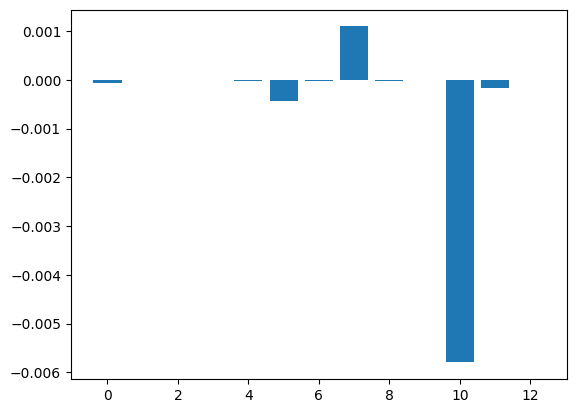

In [16]:
# Logistic Regression Importance Plot
LogisticRegression_Importance = LogisticRegression_Model.coef_[0]
for i,v in enumerate(LogisticRegression_Importance):
    print('Feature: %s, Score: %.12f' % (features[i],v))

pyplot.bar([x for x in range(len(LogisticRegression_Importance))], LogisticRegression_Importance)
pyplot.show()

In [17]:
# Random Forest
RandomForest_Model = RandomForestClassifier()
RandomForest_Model.fit(X_train, y_train)
RandomForest_Predict = RandomForest_Model.predict(X_valid)
RandomForest_Accuracy = accuracy_score(y_valid, RandomForest_Predict)
print("Accuracy is: " + str(RandomForest_Accuracy))

Accuracy is: 0.8329326923076923


Feature: acousticness, Score: 0.102996759144
Feature: danceability, Score: 0.114858592931
Feature: duration_ms, Score: 0.091347740464
Feature: energy, Score: 0.090533371267
Feature: instrumentalness, Score: 0.055440046890
Feature: key, Score: 0.031152915676
Feature: liveness, Score: 0.089714397207
Feature: loudness, Score: 0.104315988837
Feature: mode, Score: 0.013863730465
Feature: speechiness, Score: 0.110045363718
Feature: tempo, Score: 0.098959142429
Feature: time_signature, Score: 0.003586239148
Feature: valence, Score: 0.093185711825


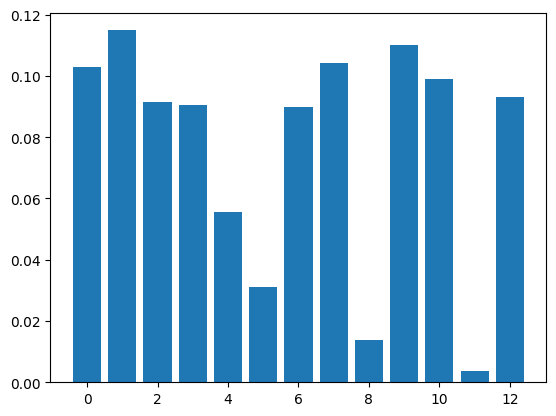

In [18]:
# Random Forest Importance Plot
RandomForest_Importance = RandomForest_Model.feature_importances_
for i,v in enumerate(RandomForest_Importance):
    print('Feature: %s, Score: %.12f' % (features[i],v))

pyplot.bar([x for x in range(len(RandomForest_Importance))], RandomForest_Importance)
pyplot.show()

In [19]:
# KNN
KNN_Model = KNeighborsClassifier()
KNN_Model.fit(X_train, y_train)
KNN_Predict = KNN_Model.predict(X_valid)
KNN_Accuracy = accuracy_score(y_valid, KNN_Predict)
print("Accuracy is: " + str(KNN_Accuracy))

Accuracy is: 0.8137019230769231


In [20]:
# Decision Tree
DecisionTree_Model = DecisionTreeClassifier()
DecisionTree_Model.fit(X_train, y_train)
DecisionTree_Predict = DecisionTree_Model.predict(X_valid)
DecisionTree_Accuracy = accuracy_score(y_valid, DecisionTree_Predict)
print("Accuracy is: " + str(DecisionTree_Accuracy))

Accuracy is: 0.7427884615384616


Feature: 0, Score: 0.10948
Feature: 1, Score: 0.13642
Feature: 2, Score: 0.05433
Feature: 3, Score: 0.09400
Feature: 4, Score: 0.06811
Feature: 5, Score: 0.03346
Feature: 6, Score: 0.09560
Feature: 7, Score: 0.08900
Feature: 8, Score: 0.01485
Feature: 9, Score: 0.09368
Feature: 10, Score: 0.09204
Feature: 11, Score: 0.00571
Feature: 12, Score: 0.11333


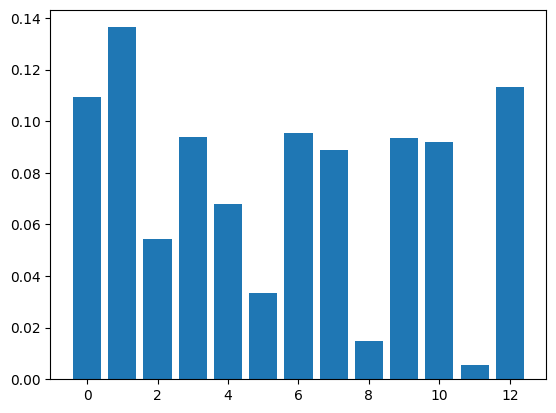

In [21]:
# Decision Tree Importance Plot
DecisionTree_Importance = DecisionTree_Model.feature_importances_
for i,v in enumerate(DecisionTree_Importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

pyplot.bar([x for x in range(len(DecisionTree_Importance))], DecisionTree_Importance)
pyplot.show()

In [22]:
# Linear Support Vector Classification
training_LinearSupportVector = training.sample(3000)
X_train_LinearSupportVector = training_LinearSupportVector[features]
y_train_LinearSupportVector = training_LinearSupportVector['hit']
X_test_LinearSupportVector = dataframe.drop(training_LinearSupportVector.index)[features]
X_train_LinearSupportVector, X_valid_LinearSupportVector, y_train_LinearSupportVector, y_valid_LinearSupportVector = train_test_split(
    X_train_LinearSupportVector, y_train_LinearSupportVector, test_size=0.2, random_state=420)

In [23]:
#Linear SVC
LinearSupportVector_Model = LinearSVC()
LinearSupportVector_Model.fit(X_train_LinearSupportVector, y_train_LinearSupportVector)
LinearSupportVector_Predict = LinearSupportVector_Model.predict(X_valid_LinearSupportVector)
LinearSupportVector_Accuracy = accuracy_score(y_valid_LinearSupportVector, LinearSupportVector_Predict)
print("Accuracy is: " + str(LinearSupportVector_Accuracy))

Accuracy is: 0.8316666666666667


In [24]:
# XG BOOST
XGBoost_Model = XGBClassifier(objective="binary:logistic", n_estimators=10, seed=123)
XGBoost_Model.fit(X_train, y_train)
XGBoost_Predict = XGBoost_Model.predict(X_valid)
XGBoost_Accuracy = accuracy_score(y_valid, XGBoost_Predict)
print("Accuracy is: " + str(XGBoost_Accuracy))

Accuracy is: 0.8269230769230769


Feature: 0, Score: 0.07116
Feature: 1, Score: 0.12620
Feature: 2, Score: 0.06085
Feature: 3, Score: 0.07472
Feature: 4, Score: 0.08762
Feature: 5, Score: 0.09686
Feature: 6, Score: 0.06215
Feature: 7, Score: 0.09038
Feature: 8, Score: 0.03790
Feature: 9, Score: 0.08743
Feature: 10, Score: 0.06350
Feature: 11, Score: 0.07876
Feature: 12, Score: 0.06247


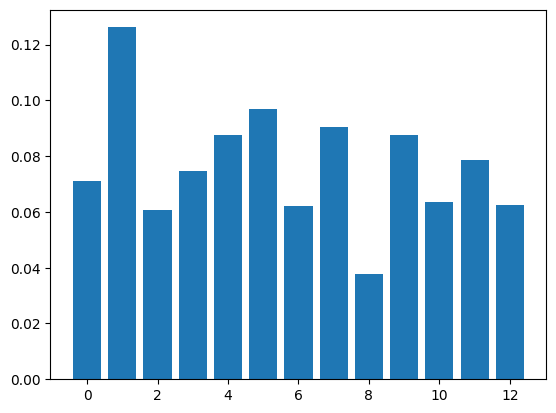

In [25]:
# XG BOOST Importance Plot
XGBoost_Importance = XGBoost_Model.feature_importances_
for i, v in enumerate(XGBoost_Importance):
    print('Feature: %0d, Score: %.5f' % (i, v))

pyplot.bar([x for x in range(len(XGBoost_Importance))], XGBoost_Importance)
pyplot.show()

In [26]:
# Gaussian Naive Bayes
GaussianNaiveBayes_Model = GaussianNB()
GaussianNaiveBayes_Model.fit(X_train, y_train)
GaussianNaiveBayes_Predict = GaussianNaiveBayes_Model.predict(X_valid)
GaussianNaiveBayes_Accuracy = accuracy_score(y_valid, GaussianNaiveBayes_Predict)
print("Accuracy is : " + str(GaussianNaiveBayes_Accuracy))

Accuracy is : 0.8377403846153846


In [27]:
# ADA Boost
AdaBoost_Model = AdaBoostClassifier()
AdaBoost_Model.fit(X_train, y_train)
AdaBoost_Predict = AdaBoost_Model.predict(X_valid)
AdaBoost_Accuracy = accuracy_score(y_valid, AdaBoost_Predict)
print("Accuracy is : " + str(AdaBoost_Accuracy))

Accuracy is : 0.8269230769230769


Feature: 0, Score: 0.10000
Feature: 1, Score: 0.10000
Feature: 2, Score: 0.14000
Feature: 3, Score: 0.16000
Feature: 4, Score: 0.12000
Feature: 5, Score: 0.02000
Feature: 6, Score: 0.06000
Feature: 7, Score: 0.08000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.10000
Feature: 10, Score: 0.08000
Feature: 11, Score: 0.02000
Feature: 12, Score: 0.02000


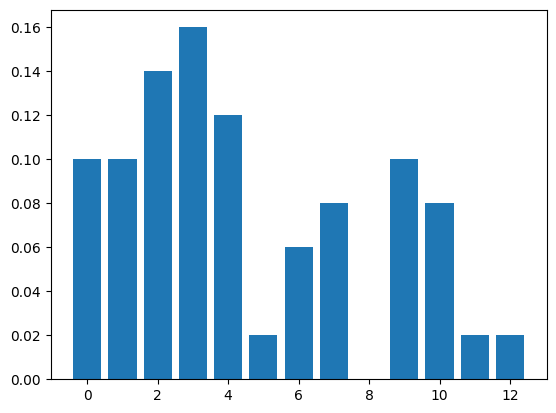

In [28]:
# ADA Boost Importance Plot
AdaBoost_Importance = AdaBoost_Model.feature_importances_
for i, v in enumerate(AdaBoost_Importance):
    print('Feature: %0d, Score: %.5f' % (i, v))

pyplot.bar([x for x in range(len(AdaBoost_Importance))], AdaBoost_Importance)
pyplot.show()

In [29]:
performance = pd.DataFrame({'Model': ['LogisticRegression',
                                                     'RandomForestClassifier',
                                                     'KNeighborsClassifier',
                                                     'DecisionTreeClassifier',
                                                     'LinearSVC',
                                                     'XGBClassifier',
                                                     'GNBClassifier',
                                                     'ADABoostClassifier'],
                                           'Accuracy_Obtained': [LogisticRegression_Accuracy,
                                                                 RandomForest_Accuracy,
                                                                 KNN_Accuracy,
                                                                 DecisionTree_Accuracy,
                                                                 LinearSupportVector_Accuracy,
                                                                 XGBoost_Accuracy,
                                                                 GaussianNaiveBayes_Accuracy,
                                                                 AdaBoost_Accuracy]})

In [30]:
performance.sort_values(by="Accuracy_Obtained", ascending=False)

,Model,Accuracy_Obtained
0,LogisticRegression,0.837740
6,GNBClassifier,0.837740
1,RandomForestClassifier,0.832933
4,LinearSVC,0.831667
5,XGBClassifier,0.826923
7,ADABoostClassifier,0.826923
2,KNeighborsClassifier,0.813702
3,DecisionTreeClassifier,0.742788


In [31]:
features = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "liveness", "loudness",
             "speechiness", "tempo", "valence"]

In [32]:
training = dataframe.sample(frac = 0.8,random_state = 420)
X_train = training[features]
y_train = training['hit']
X_test = dataframe.drop(training.index)[features]

In [33]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 420, shuffle=True)

In [34]:
# Logistic Regression
LogisticRegression_Model = LogisticRegression()
LogisticRegression_Model.fit(X_train, y_train)
LogisticRegression_Predict = LogisticRegression_Model.predict(X_valid)
LogisticRegression_Accuracy = accuracy_score(y_valid, LogisticRegression_Predict)
print("Accuracy is: " + str(LogisticRegression_Accuracy))

Accuracy is: 0.8377403846153846


Feature: acousticness, Score: -0.000064103935
Feature: danceability, Score: -0.000001562822
Feature: duration_ms, Score: -0.000004098988
Feature: energy, Score: -0.000002230833
Feature: instrumentalness, Score: -0.000022592046
Feature: liveness, Score: -0.000013863560
Feature: loudness, Score: 0.001093832361
Feature: speechiness, Score: -0.000003642148
Feature: tempo, Score: -0.005791836665
Feature: valence, Score: -0.000006103075


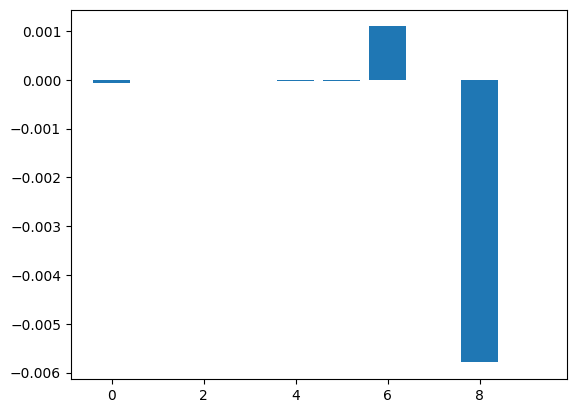

In [35]:
# Logistic Regression Importance Plot
LogisticRegression_Importance = LogisticRegression_Model.coef_[0]
for i,v in enumerate(LogisticRegression_Importance):
    print('Feature: %s, Score: %.12f' % (features[i],v))

pyplot.bar([x for x in range(len(LogisticRegression_Importance))], LogisticRegression_Importance)
pyplot.show()

In [36]:
# Random Forest
RandomForest_Model = RandomForestClassifier()
RandomForest_Model.fit(X_train, y_train)
RandomForest_Predict = RandomForest_Model.predict(X_valid)
RandomForest_Accuracy = accuracy_score(y_valid, RandomForest_Predict)
print("Accuracy is: " + str(RandomForest_Accuracy))

Accuracy is: 0.8293269230769231


Feature: acousticness, Score: 0.107101039089
Feature: danceability, Score: 0.118381815616
Feature: duration_ms, Score: 0.094836961518
Feature: energy, Score: 0.097305545641
Feature: instrumentalness, Score: 0.059256003628
Feature: liveness, Score: 0.094621717394
Feature: loudness, Score: 0.111518264690
Feature: speechiness, Score: 0.112933136865
Feature: tempo, Score: 0.101008195090
Feature: valence, Score: 0.103037320470


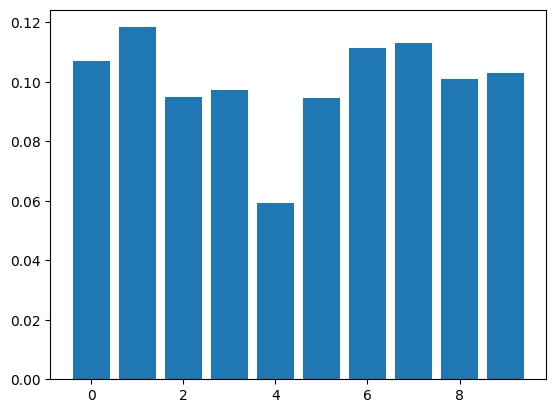

In [37]:
# Random Forest Importance Plot
RandomForest_Importance = RandomForest_Model.feature_importances_
for i,v in enumerate(RandomForest_Importance):
    print('Feature: %s, Score: %.12f' % (features[i],v))

pyplot.bar([x for x in range(len(RandomForest_Importance))], RandomForest_Importance)
pyplot.show()

In [38]:
# KNN
KNN_Model = KNeighborsClassifier()
KNN_Model.fit(X_train, y_train)
KNN_Predict = KNN_Model.predict(X_valid)
KNN_Accuracy = accuracy_score(y_valid, KNN_Predict)
print("Accuracy is: " + str(KNN_Accuracy))

Accuracy is: 0.8137019230769231


In [39]:
# Decision Tree
DecisionTree_Model = DecisionTreeClassifier()
DecisionTree_Model.fit(X_train, y_train)
DecisionTree_Predict = DecisionTree_Model.predict(X_valid)
DecisionTree_Accuracy = accuracy_score(y_valid, DecisionTree_Predict)
print("Accuracy is: " + str(DecisionTree_Accuracy))

Accuracy is: 0.7451923076923077


Feature: 0, Score: 0.10396
Feature: 1, Score: 0.13332
Feature: 2, Score: 0.05970
Feature: 3, Score: 0.09013
Feature: 4, Score: 0.06335
Feature: 5, Score: 0.10229
Feature: 6, Score: 0.09431
Feature: 7, Score: 0.11085
Feature: 8, Score: 0.11968
Feature: 9, Score: 0.12241


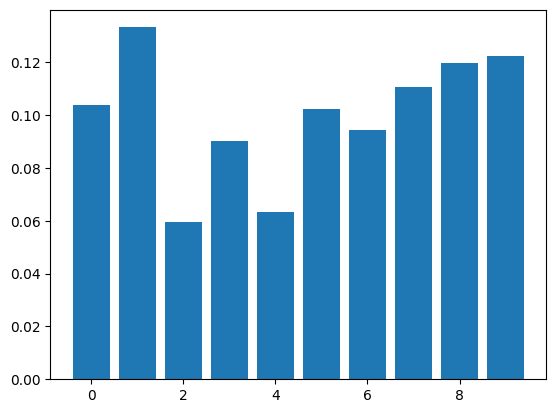

In [40]:
# Decision Tree Importance Plot
DecisionTree_Importance = DecisionTree_Model.feature_importances_
for i,v in enumerate(DecisionTree_Importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

pyplot.bar([x for x in range(len(DecisionTree_Importance))], DecisionTree_Importance)
pyplot.show()

In [41]:
# Linear Support Vector Classification
training_LinearSupportVector = training.sample(3000)
X_train_LinearSupportVector = training_LinearSupportVector[features]
y_train_LinearSupportVector = training_LinearSupportVector['hit']
X_test_LinearSupportVector = dataframe.drop(training_LinearSupportVector.index)[features]
X_train_LinearSupportVector, X_valid_LinearSupportVector, y_train_LinearSupportVector, y_valid_LinearSupportVector = train_test_split(X_train_LinearSupportVector, y_train_LinearSupportVector, test_size = 0.2, random_state = 420)

In [42]:
#Linear SVC
LinearSupportVector_Model = LinearSVC()
LinearSupportVector_Model.fit(X_train_LinearSupportVector, y_train_LinearSupportVector)
LinearSupportVector_Predict = LinearSupportVector_Model.predict(X_valid_LinearSupportVector)
LinearSupportVector_Accuracy = accuracy_score(y_valid_LinearSupportVector, LinearSupportVector_Predict)
print("Accuracy is: " + str(LinearSupportVector_Accuracy))

Accuracy is: 0.8183333333333334


In [43]:
# XG BOOST
XGBoost_Model = XGBClassifier(objective = "binary:logistic", n_estimators = 10, seed = 123)
XGBoost_Model.fit(X_train, y_train)
XGBoost_Predict = XGBoost_Model.predict(X_valid)
XGBoost_Accuracy = accuracy_score(y_valid, XGBoost_Predict)
print("Accuracy is: " + str(XGBoost_Accuracy))

Accuracy is: 0.8317307692307693


Feature: 0, Score: 0.10251
Feature: 1, Score: 0.16011
Feature: 2, Score: 0.07636
Feature: 3, Score: 0.09176
Feature: 4, Score: 0.10587
Feature: 5, Score: 0.08055
Feature: 6, Score: 0.11347
Feature: 7, Score: 0.10614
Feature: 8, Score: 0.07870
Feature: 9, Score: 0.08454


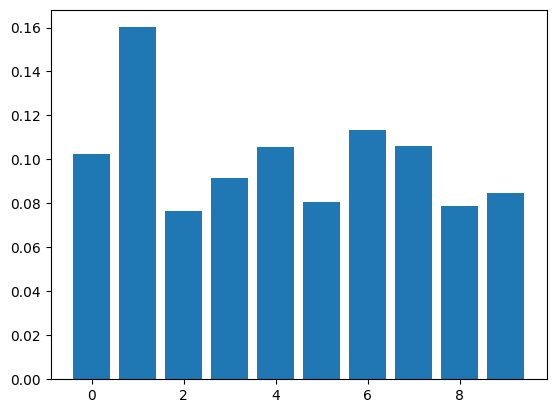

In [44]:
# XG BOOST Importance Plot
XGBoost_Importance = XGBoost_Model.feature_importances_
for i,v in enumerate(XGBoost_Importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

pyplot.bar([x for x in range(len(XGBoost_Importance))], XGBoost_Importance)
pyplot.show()

In [45]:
# Gaussian Naive Bayes
GaussianNaiveBayes_Model = GaussianNB()
GaussianNaiveBayes_Model.fit(X_train, y_train)
GaussianNaiveBayes_Predict = GaussianNaiveBayes_Model.predict(X_valid)
GaussianNaiveBayes_Accuracy = accuracy_score(y_valid, GaussianNaiveBayes_Predict)
print("Accuracy is : " + str(GaussianNaiveBayes_Accuracy))

Accuracy is : 0.8377403846153846


In [46]:
# ADA Boost
AdaBoost_Model = AdaBoostClassifier()
AdaBoost_Model.fit(X_train, y_train)
AdaBoost_Predict = AdaBoost_Model.predict(X_valid)
AdaBoost_Accuracy = accuracy_score(y_valid, AdaBoost_Predict)
print("Accuracy is : " + str(AdaBoost_Accuracy))

Accuracy is : 0.828125


Feature: 0, Score: 0.08000
Feature: 1, Score: 0.10000
Feature: 2, Score: 0.18000
Feature: 3, Score: 0.16000
Feature: 4, Score: 0.12000
Feature: 5, Score: 0.08000
Feature: 6, Score: 0.08000
Feature: 7, Score: 0.10000
Feature: 8, Score: 0.08000
Feature: 9, Score: 0.02000


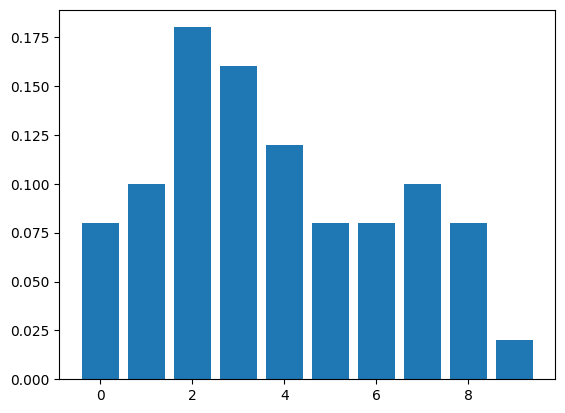

In [47]:
# ADA Boost Importance Plot
AdaBoost_Importance = AdaBoost_Model.feature_importances_
for i,v in enumerate(AdaBoost_Importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

pyplot.bar([x for x in range(len(AdaBoost_Importance))], AdaBoost_Importance)
pyplot.show()

In [48]:
performance = pd.DataFrame({'Model': ['LogisticRegression',
                                                     'RandomForestClassifier',
                                                     'KNeighborsClassifier',
                                                     'DecisionTreeClassifier',
                                                     'LinearSVC',
                                                     'XGBClassifier',
                                                     'GNBClassifier',
                                                     'ADABoostClassifier'],
                                           'Accuracy_Obtained': [LogisticRegression_Accuracy,
                                                        RandomForest_Accuracy,
                                                        KNN_Accuracy,
                                                        DecisionTree_Accuracy,
                                                        LinearSupportVector_Accuracy,
                                                        XGBoost_Accuracy,
                                                        GaussianNaiveBayes_Accuracy,
                                                        AdaBoost_Accuracy]})

In [49]:
performance.sort_values(by = "Accuracy_Obtained", ascending = False)

,Model,Accuracy_Obtained
0,LogisticRegression,0.837740
6,GNBClassifier,0.837740
5,XGBClassifier,0.831731
1,RandomForestClassifier,0.829327
7,ADABoostClassifier,0.828125
4,LinearSVC,0.818333
2,KNeighborsClassifier,0.813702
3,DecisionTreeClassifier,0.745192
